In [62]:
import numpy as np
import pandas as pd
import os
from scipy import misc
import matplotlib.pyplot as plt

%matplotlib inline

pin_info_data = r'C:\Users\newline\Documents\ImageClassification\data\statistics\sam_new\aerial_cropped\prediction_stats\tr_cv_ts_pins_info.csv'

# overlayed_ts_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/overlayed_images/96x96_0.0005/ts_pred_stats.csv'
# overlayed_cv_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/overlayed_images/96x96_0.0005/cv_pred_stats.csv'

# aerial_ts_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/aerial_images/ts_pred_stats.csv'
# aerial_cv_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/aerial_images/cv_pred_stats.csv'

# assessor_ts_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/assessor_images/ts_pred_stats.csv'
# assessor_cv_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/assessor_images/cv_pred_stats.csv'

aerial_cropped_ts_stats = r'C:\Users\newline\Documents\ImageClassification\data\statistics\sam_new\aerial_cropped\prediction_stats\pred_outcomes.csv'

aerial_cropped_image_path = r'C:\Users\newline\Documents\ImageClassification\data\input_images\sam_new\aerial_cropped'


In [ ]:
# pin_info_data = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/overlayed_images/cv_train_pins_info.csv'

# overlayed_ts_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/overlayed_images/96x96_0.0005/ts_pred_stats.csv'
# overlayed_cv_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/overlayed_images/96x96_0.0005/cv_pred_stats.csv'

# aerial_ts_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/aerial_images/ts_pred_stats.csv'
# aerial_cv_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/aerial_images/cv_pred_stats.csv'

# assessor_ts_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/assessor_images/ts_pred_stats.csv'
# assessor_cv_stats = '/Users/sam/All-Program/App-DataSet/HouseClassification/statistics/assessor_images/cv_pred_stats.csv'



In [77]:
import imutils
from scipy import misc

def central_crop(image, height, width):
    if image.shape[0] > height and image.shape[1] > width:
        ysize, xsize, chan = image.shape
        xoff = (xsize - height) // 2
        yoff = (ysize - width) // 2
        img = image[yoff:-yoff, xoff:-xoff]
        # print (img.shape)
    else:
        img = image
    return img


def zero_pad(inp, crop_shape, out_shape):

    m, n, c = crop_shape  
    out_m, out_n, out_c = out_shape
    
    to_pad_m = max(out_m - m, 0)
    to_pad_n = max(out_n - n, 0)
    to_pad_c = max(out_c - c, 0)
    
    pad_m1 = to_pad_m // 2
    pad_m2 = to_pad_m - pad_m1
    
    pad_n1 = to_pad_n // 2
    pad_n2 = to_pad_n - pad_n1
    
    pad_c1 = to_pad_c // 2
    pad_c2 = to_pad_c - pad_c1
    
    inp = np.pad(inp, ((pad_m1, pad_m2), (pad_n1, pad_n2), (pad_c1, pad_c2)), 'constant')
    return inp


class GetImages():
    def __init__(self, img_in_shape, img_out_shape, img_crop_shape, img_resize_shape,
                 enable_rotation=True):
        # print(img_in_shape, img_out_shape, img_crop_shape, img_resize_shape)
       
        self.img_in_shape = img_in_shape
        self.img_out_shape = img_out_shape
        
        
        if img_crop_shape is not None:
            self.img_crop_shape = img_crop_shape
        else:
            self.img_crop_shape = []
        
        if img_resize_shape is not None:
            self.img_resize_shape = img_resize_shape
        else:
            self.img_resize_shape = []
        
        if enable_rotation:
            self.angle = 90
            self.enable_rotation = enable_rotation
        else:
            self.enable_rotation = False
        
    
    def process_images_given_path(self, pic_path):
        image = misc.imread(pic_path, mode='RGB')
        
        # if self.image_type == 'aerial_cropped':
        if image.shape[0] == self.img_in_shape[0] and image.shape[1] == self.img_in_shape[1]:
            # The above condition takes care of the different sizes. If a bounding box was already cropped
            # then we don't crop further. But if no bounding box was found then we perform a central crop.
            if len(self.img_crop_shape) > 0:
                image = central_crop(image, height=self.img_crop_shape[0], width=self.img_crop_shape[1])
        
        # If the height is greater than width then we rotate the image by 90%
        if self.enable_rotation:
            if image.shape[0] > image.shape[1]:
                image = imutils.rotate_bound(image, self.angle)
        
        if len(self.img_resize_shape) > 0:
            image = misc.imresize(image, self.img_resize_shape)
        
        if image.shape[0] - self.img_out_shape[0] < 0:
            image = zero_pad(inp=image, crop_shape=self.img_crop_shape, out_shape=self.img_out_shape)
        elif len(self.img_out_shape) > 0:
            image = misc.imresize(image, self.img_out_shape)
        
        return image

In [92]:
def vizualize(get_img_obj, image_path_array, title_arr, data_type, rows, columns, figsize=(40, 6)):
    fig1, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='y', edgecolor='k')
    if columns>1:
        axs = axs.ravel()
    for no, (image_path, title) in enumerate(zip(image_path_array, title_arr)):
        image = get_img_obj.process_images_given_path(image_path)
        axs[no].imshow(np.array(image, dtype=data_type))
        axs[no].set_title(title,fontsize= 25)

In [6]:
pin_info = pd.read_csv(pin_info_data, index_col=None)
test_pins = pin_info[pin_info['dataset_type'] == 'test'].reset_index().drop('index', 1)
cv_pins = pin_info[pin_info['dataset_type'] == 'cvalid'].reset_index().drop('index', 1)
print (pin_info.shape)
print (test_pins.shape)
print (cv_pins.shape)
pin_info.head(3)

(11466, 3)
(1146, 3)
(1146, 3)


property_pins property_type dataset_type
0  20-17-305-044-0000          land         test
1  16-14-111-018-0000          land         test
2  20-17-108-025-0000          land         test

# AERIAL CROPPED DATA
------------

In [9]:
aerial_cropped_ts_data = pd.read_csv(aerial_cropped_ts_stats, index_col=None)
# overlayed_cv_data = pd.read_csv(aerial_cropped_cv_stats, index_col=None)
print (aerial_cropped_ts_data.shape)
# print (overlayed_cv_data.shape)
pd.concat([aerial_cropped_ts_data.head(3), aerial_cropped_ts_data.tail(3)])

(5730, 5)


checkpoint test_batch  true_label  pred_label  pred_prob
0     epoch_19_batch_39       test         0.0           0      1.000
1     epoch_19_batch_39       test         0.0           0      1.000
2     epoch_19_batch_39       test         0.0           0      0.995
5727  epoch_19_batch_70       test         1.0           1      1.000
5728  epoch_19_batch_70       test         1.0           1      1.000
5729  epoch_19_batch_70       test         1.0           1      1.000

In [10]:
test_data_epoch19_batch70 = aerial_cropped_ts_data[aerial_cropped_ts_data['checkpoint'] == 'epoch_19_batch_39']
print (test_data_epoch19_batch70.shape)
test_data_epoch19_batch70.head()

(1146, 5)


checkpoint test_batch  true_label  pred_label  pred_prob
0  epoch_19_batch_39       test         0.0           0      1.000
1  epoch_19_batch_39       test         0.0           0      1.000
2  epoch_19_batch_39       test         0.0           0      0.995
3  epoch_19_batch_39       test         0.0           0      1.000
4  epoch_19_batch_39       test         0.0           0      1.000

In [11]:
print (test_pins.shape)
test_pins.head()

(1146, 3)


property_pins property_type dataset_type
0  20-17-305-044-0000          land         test
1  16-14-111-018-0000          land         test
2  20-17-108-025-0000          land         test
3  20-21-301-028-0000          land         test
4  20-17-115-036-0000          land         test

In [12]:
aerial_cropped_combined_data = pd.concat([test_pins[['property_pins', 'property_type']], test_data_epoch19_batch70], axis=1)
print (aerial_cropped_combined_data.shape)
aerial_cropped_combined_data.head()

(1146, 7)


property_pins property_type         checkpoint test_batch  true_label  \
0  20-17-305-044-0000          land  epoch_19_batch_39       test         0.0   
1  16-14-111-018-0000          land  epoch_19_batch_39       test         0.0   
2  20-17-108-025-0000          land  epoch_19_batch_39       test         0.0   
3  20-21-301-028-0000          land  epoch_19_batch_39       test         0.0   
4  20-17-115-036-0000          land  epoch_19_batch_39       test         0.0   

   pred_label  pred_prob  
0           0      1.000  
1           0      1.000  
2           0      0.995  
3           0      1.000  
4           0      1.000

### Should be predicted as land

In [25]:
land_misclassified = aerial_cropped_combined_data[((aerial_cropped_combined_data['true_label'] == 0) & 
                                                   (aerial_cropped_combined_data['pred_label'] == 1))]
print (land_misclassified.shape)
land_misclassified.head()

(47, 7)


property_pins property_type         checkpoint test_batch  \
15  16-02-326-022-0000          land  epoch_19_batch_39       test   
24  16-16-219-006-0000          land  epoch_19_batch_39       test   
45  20-17-114-004-0000          land  epoch_19_batch_39       test   
47  16-23-400-008-0000          land  epoch_19_batch_39       test   
49  20-08-406-043-0000          land  epoch_19_batch_39       test   

    true_label  pred_label  pred_prob  
15         0.0           1      1.000  
24         0.0           1      0.730  
45         0.0           1      1.000  
47         0.0           1      0.998  
49         0.0           1      0.933

### Should be predicted as House

In [26]:
house_misclassified = aerial_cropped_combined_data[((aerial_cropped_combined_data['true_label'] == 1) & 
                                                   (aerial_cropped_combined_data['pred_label'] == 0))]
print (house_misclassified.shape)
house_misclassified.head()

(57, 7)


property_pins property_type         checkpoint test_batch  \
577  20-16-201-029-0000         house  epoch_19_batch_39       test   
582  16-03-403-013-0000         house  epoch_19_batch_39       test   
584  17-03-200-063-1002         house  epoch_19_batch_39       test   
588  16-05-410-036-0000         house  epoch_19_batch_39       test   
589  17-32-221-021-0000         house  epoch_19_batch_39       test   

     true_label  pred_label  pred_prob  
577         1.0           0      1.000  
582         1.0           0      0.929  
584         1.0           0      0.986  
588         1.0           0      0.670  
589         1.0           0      1.000

## Vizualize bad prediction

In [59]:
land_misclassified_pins_path = [os.path.join(aerial_cropped_image_path, 'land', pins+'.jpg') 
                                for pins in np.array(land_misclassified['property_pins'])]
house_misclassified_pins_path = [os.path.join(aerial_cropped_image_path, 'house', pins+'.jpg') 
                                for pins in np.array(house_misclassified['property_pins'])]
print(len(land_misclassified_pins_path))
print(len(house_misclassified_pins_path))

47
57


In [85]:
land_mis_title_arr = np.array(land_misclassified["property_pins"].astype(str) + '--' + land_misclassified["pred_prob"].round(2).astype(str))
house_mis_title_arr = np.array(house_misclassified["property_pins"].astype(str) + '--' + house_misclassified["pred_prob"].round(2).astype(str))
print (len(land_mis_title_arr), len(hosue_mis_title_arr))

47 57


In [79]:
obj_gI = GetImages(
            img_in_shape = [400, 400, 3],
            img_out_shape = [224, 224, 3],
            img_crop_shape = [128, 128, 3],
            img_resize_shape = [128, 128, 3],
            enable_rotation = True)


## LAND MISCLASSIFIED

#### Statistics:
Land: 

 * Misclassified : 47
 * Human Interpretation: Predicted as house and Actually a house: 33
 * Actual Model Misclassification : 30%

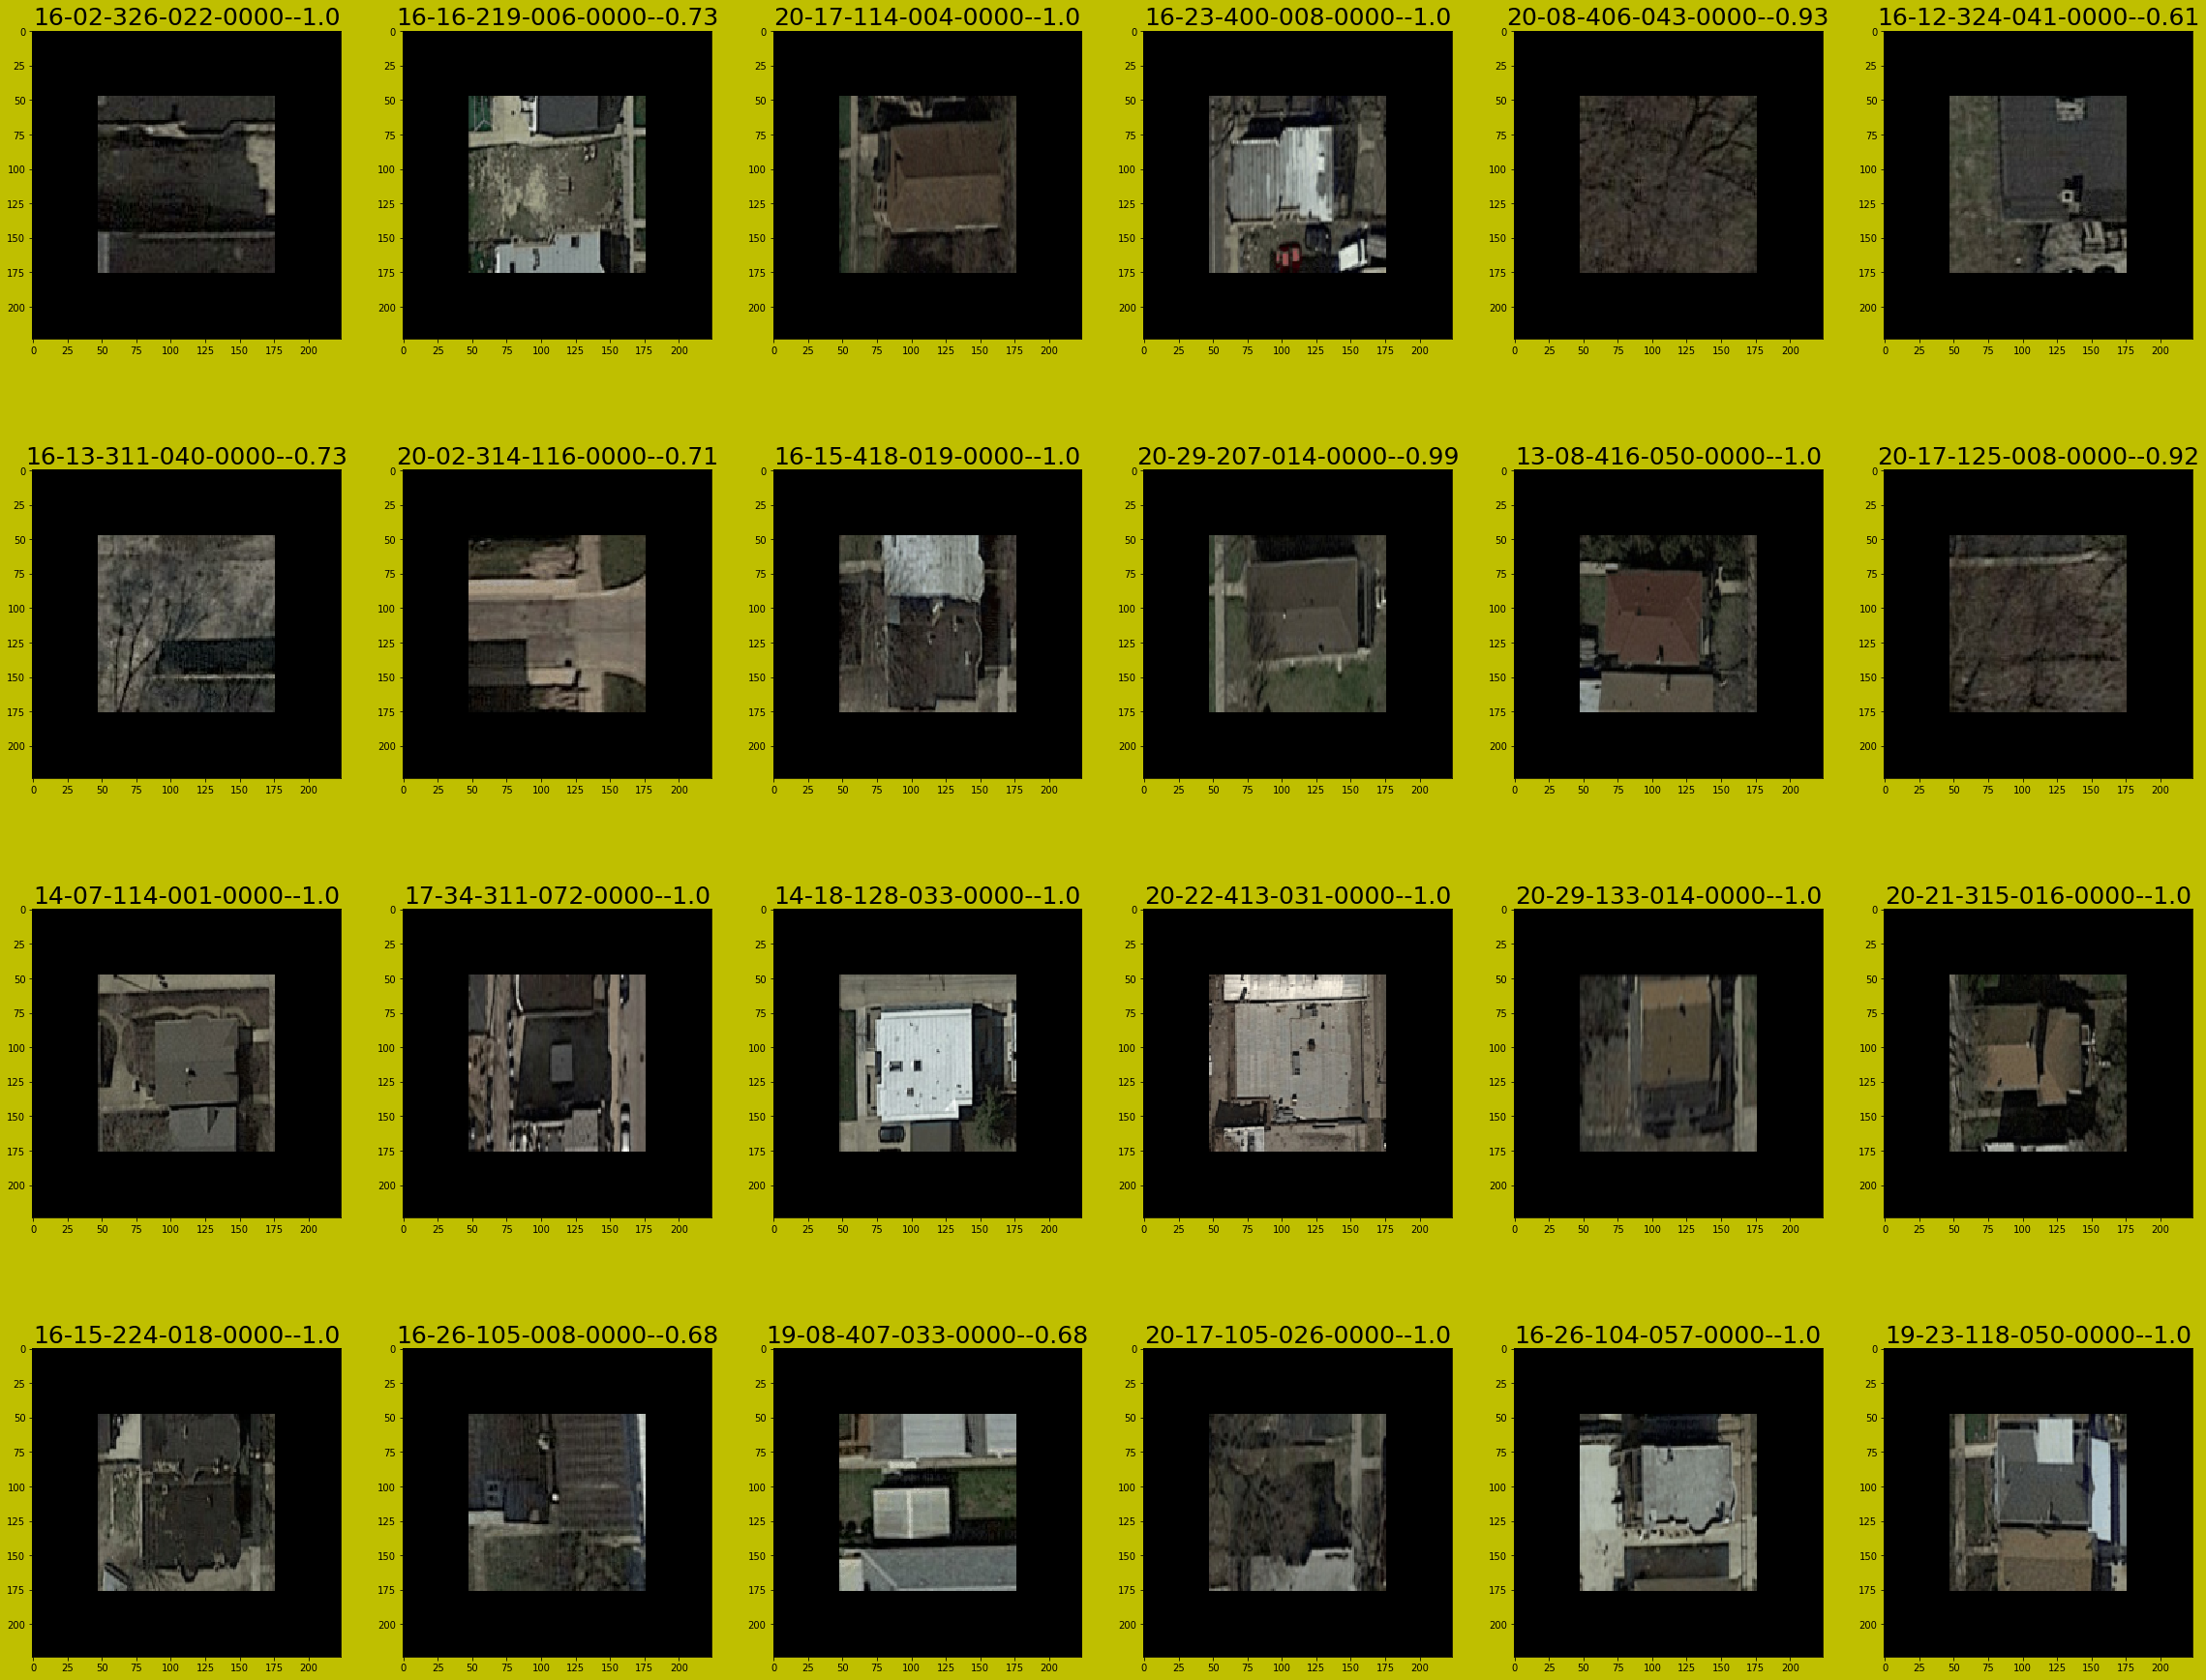

In [93]:
vizualize(obj_gI, land_misclassified_pins_path[0:24], land_mis_title_arr, data_type='uint8', rows=4, columns=6, figsize=(40, 32))

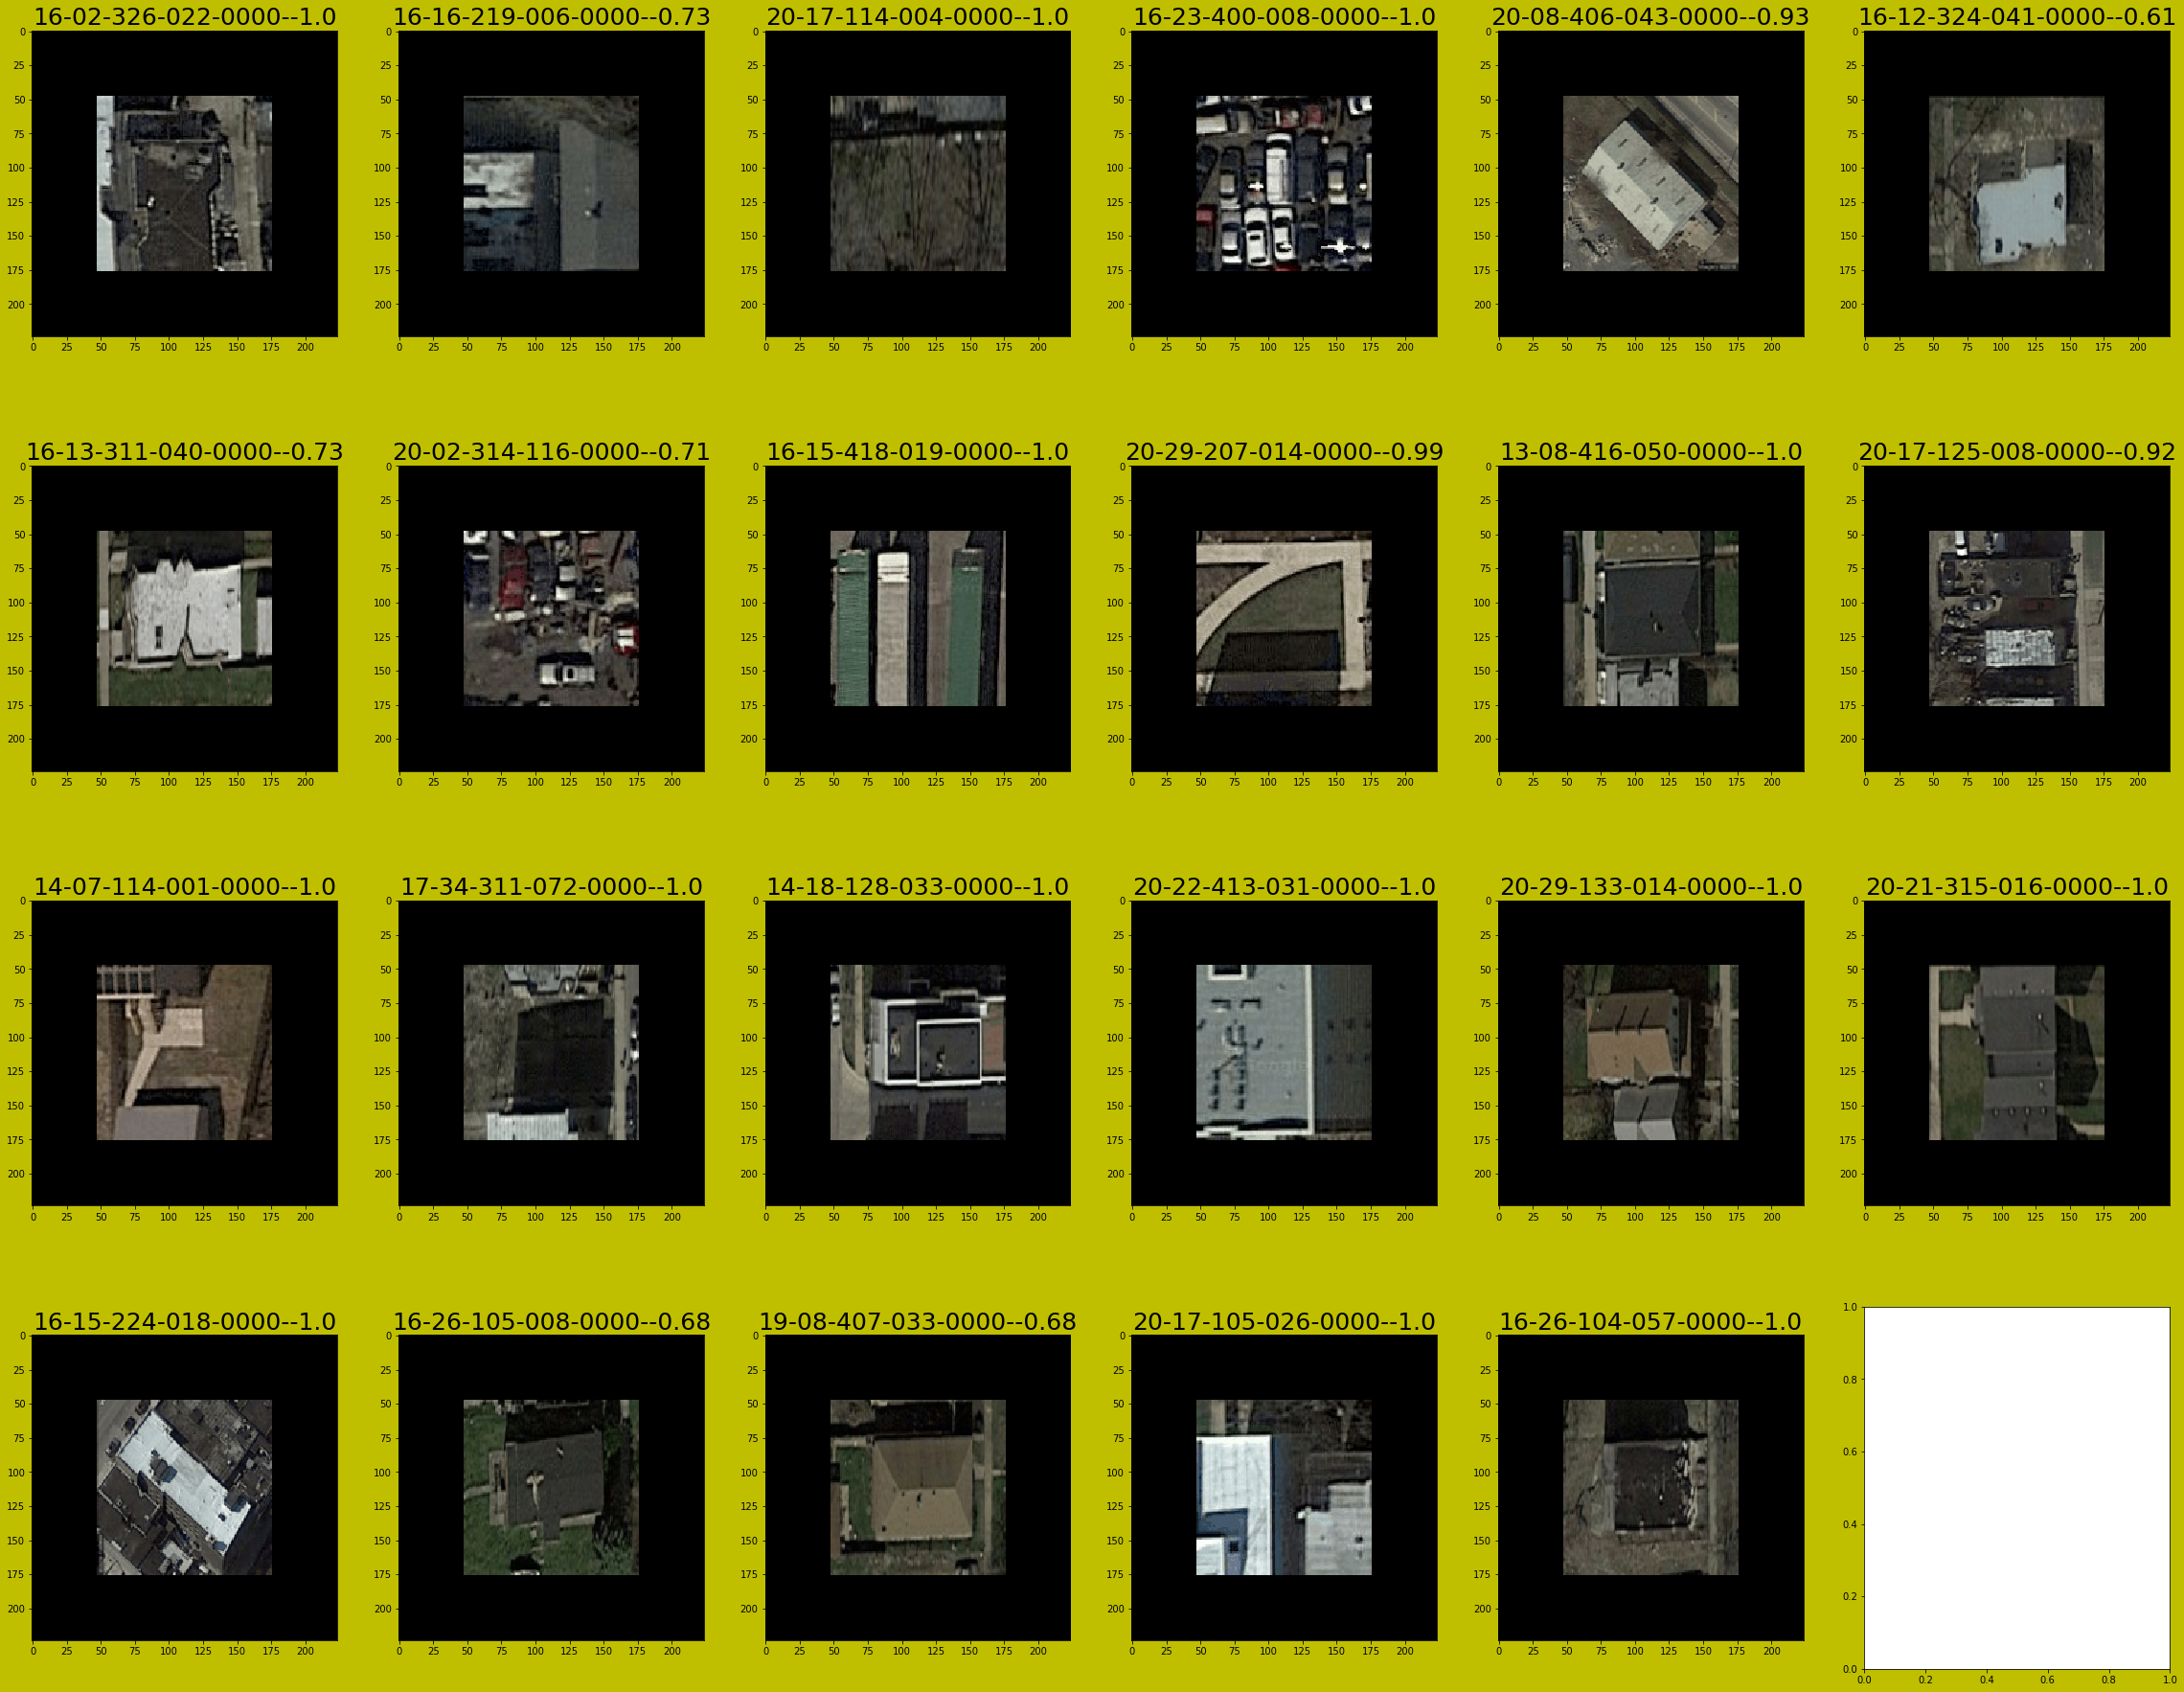

In [94]:
 vizualize(obj_gI, land_misclassified_pins_path[24:48], land_mis_title_arr, data_type='uint8', rows=4, columns=6, figsize=(40, 32))

## HOUSE MISCLASSIFIED
#### Statistics:
House:
 * Misclassified : 57
 * Human Interpretation: Predicted as land and Actually a land: 30
 * Actual Model Misclassification : 48%

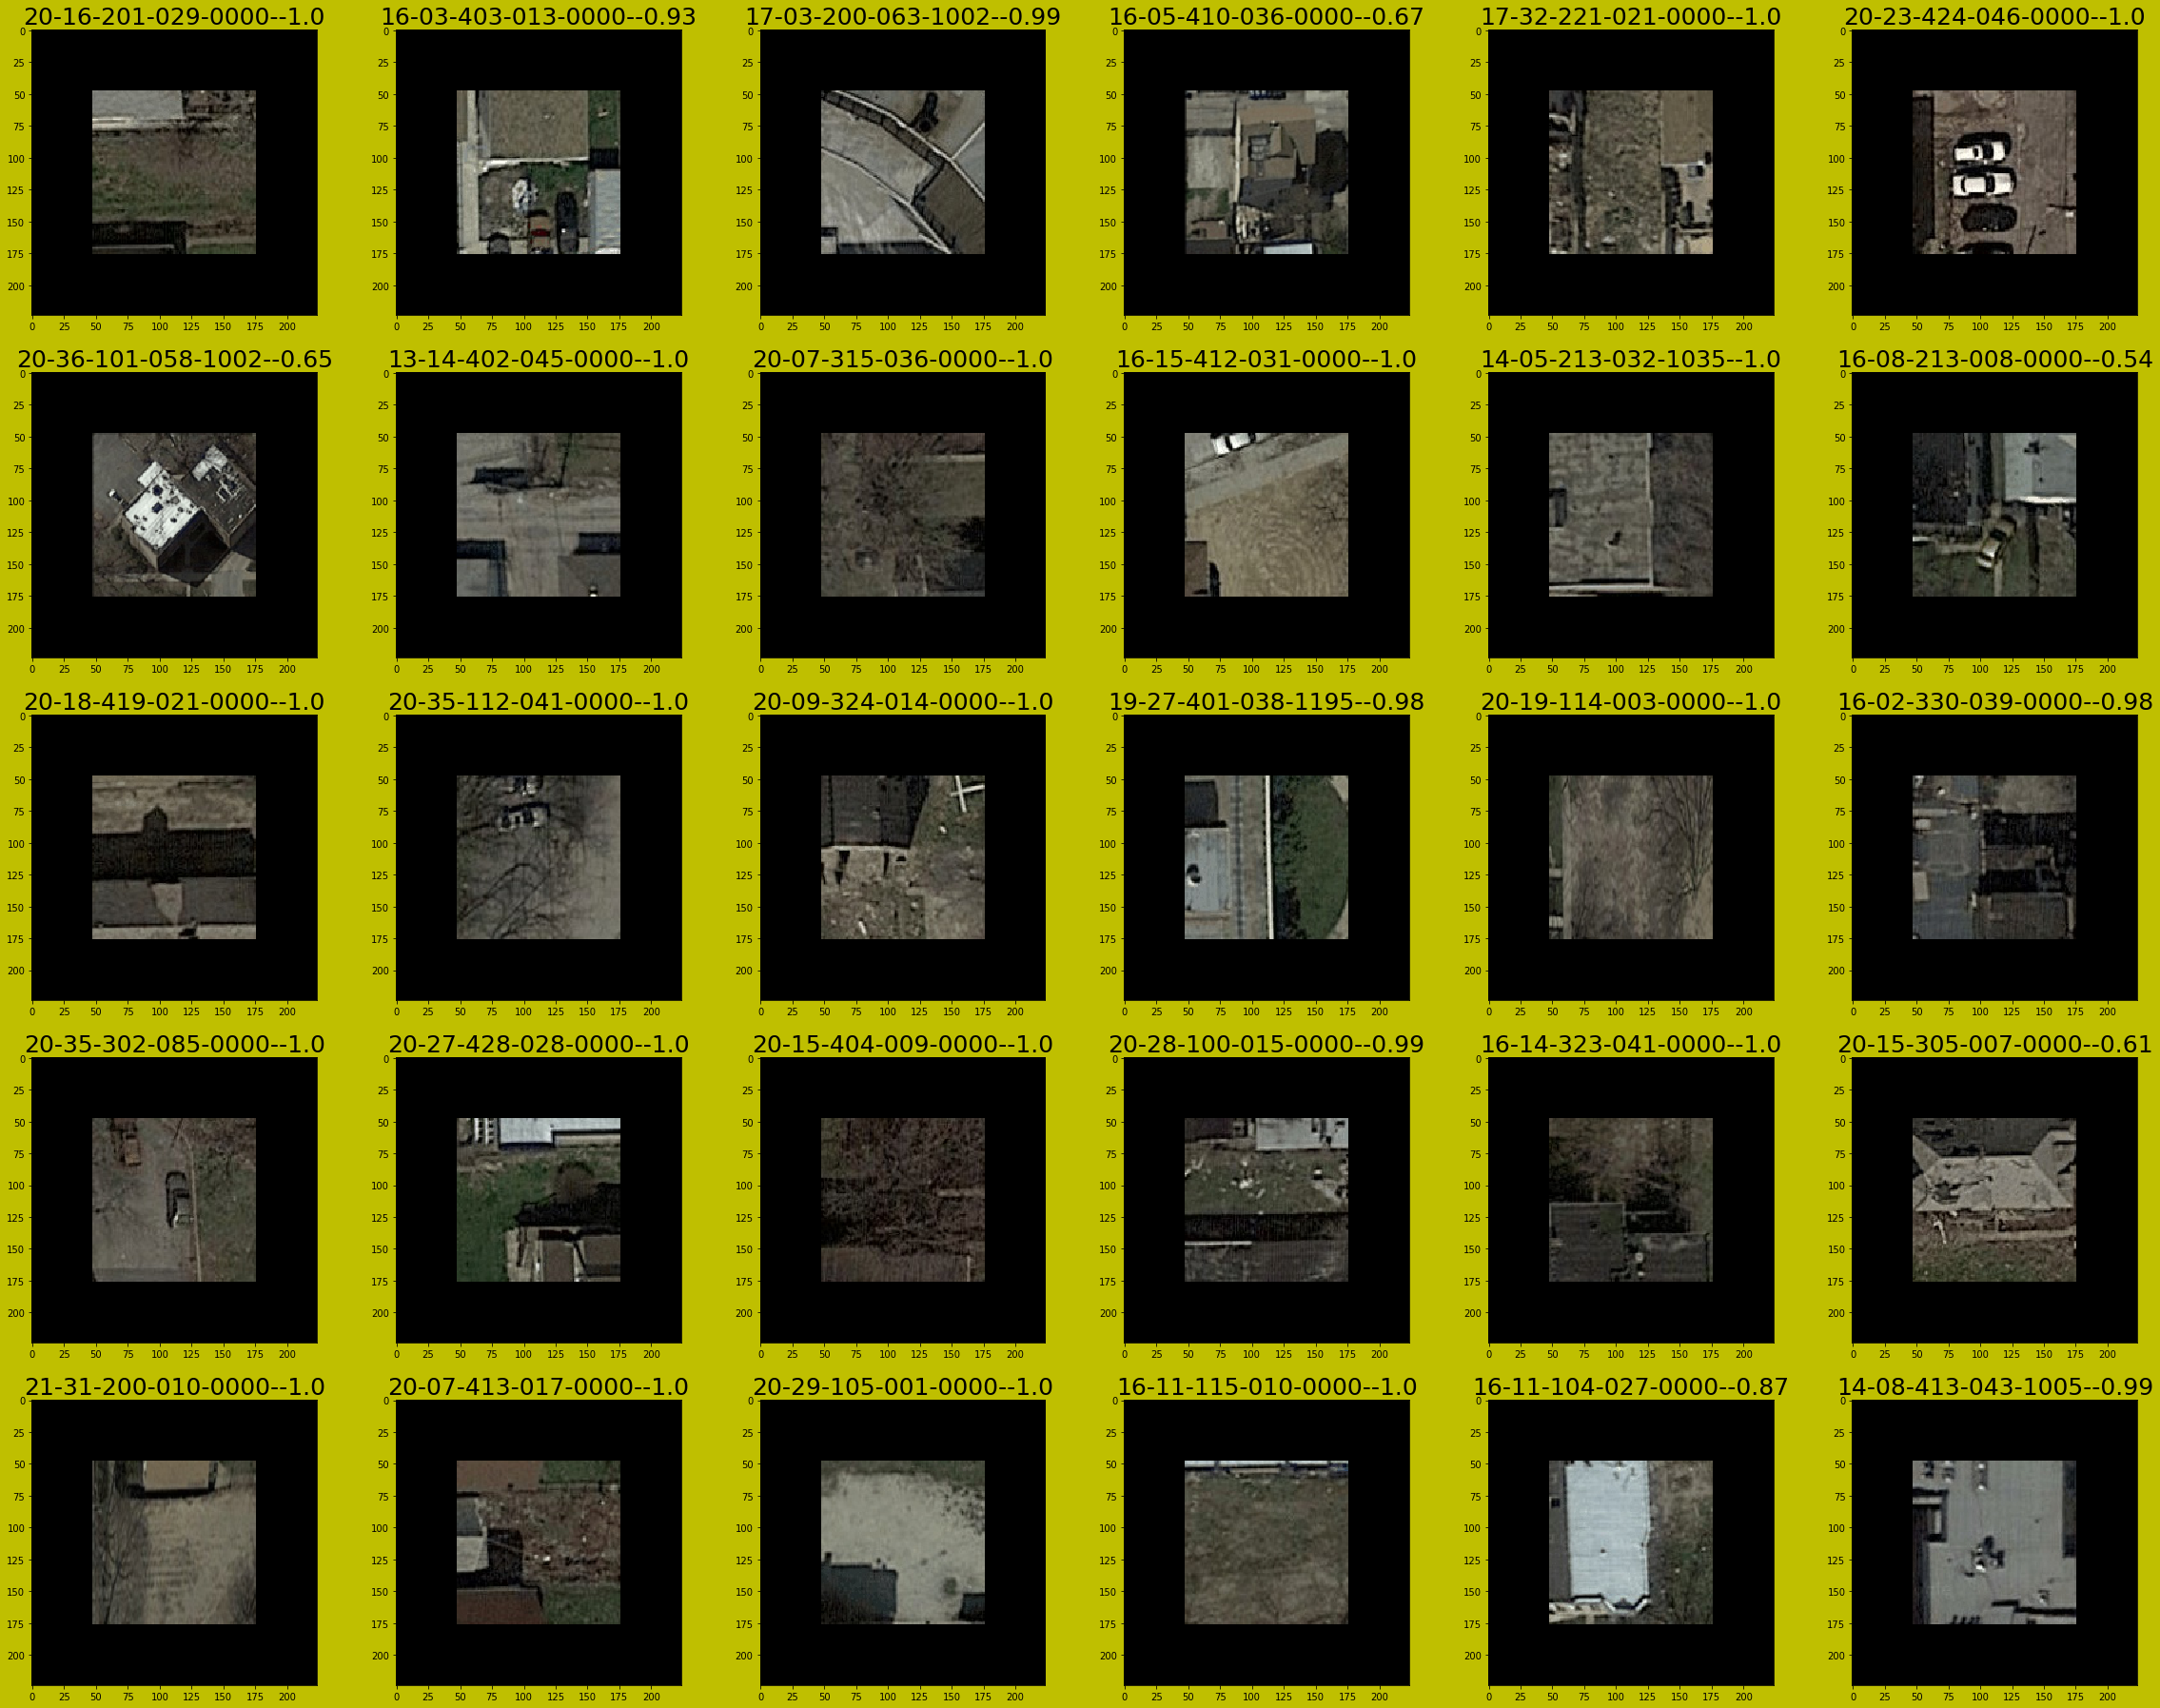

In [95]:
 vizualize(obj_gI, house_misclassified_pins_path[0:30], house_mis_title_arr, data_type='uint8', rows=5, columns=6, figsize=(40, 32))

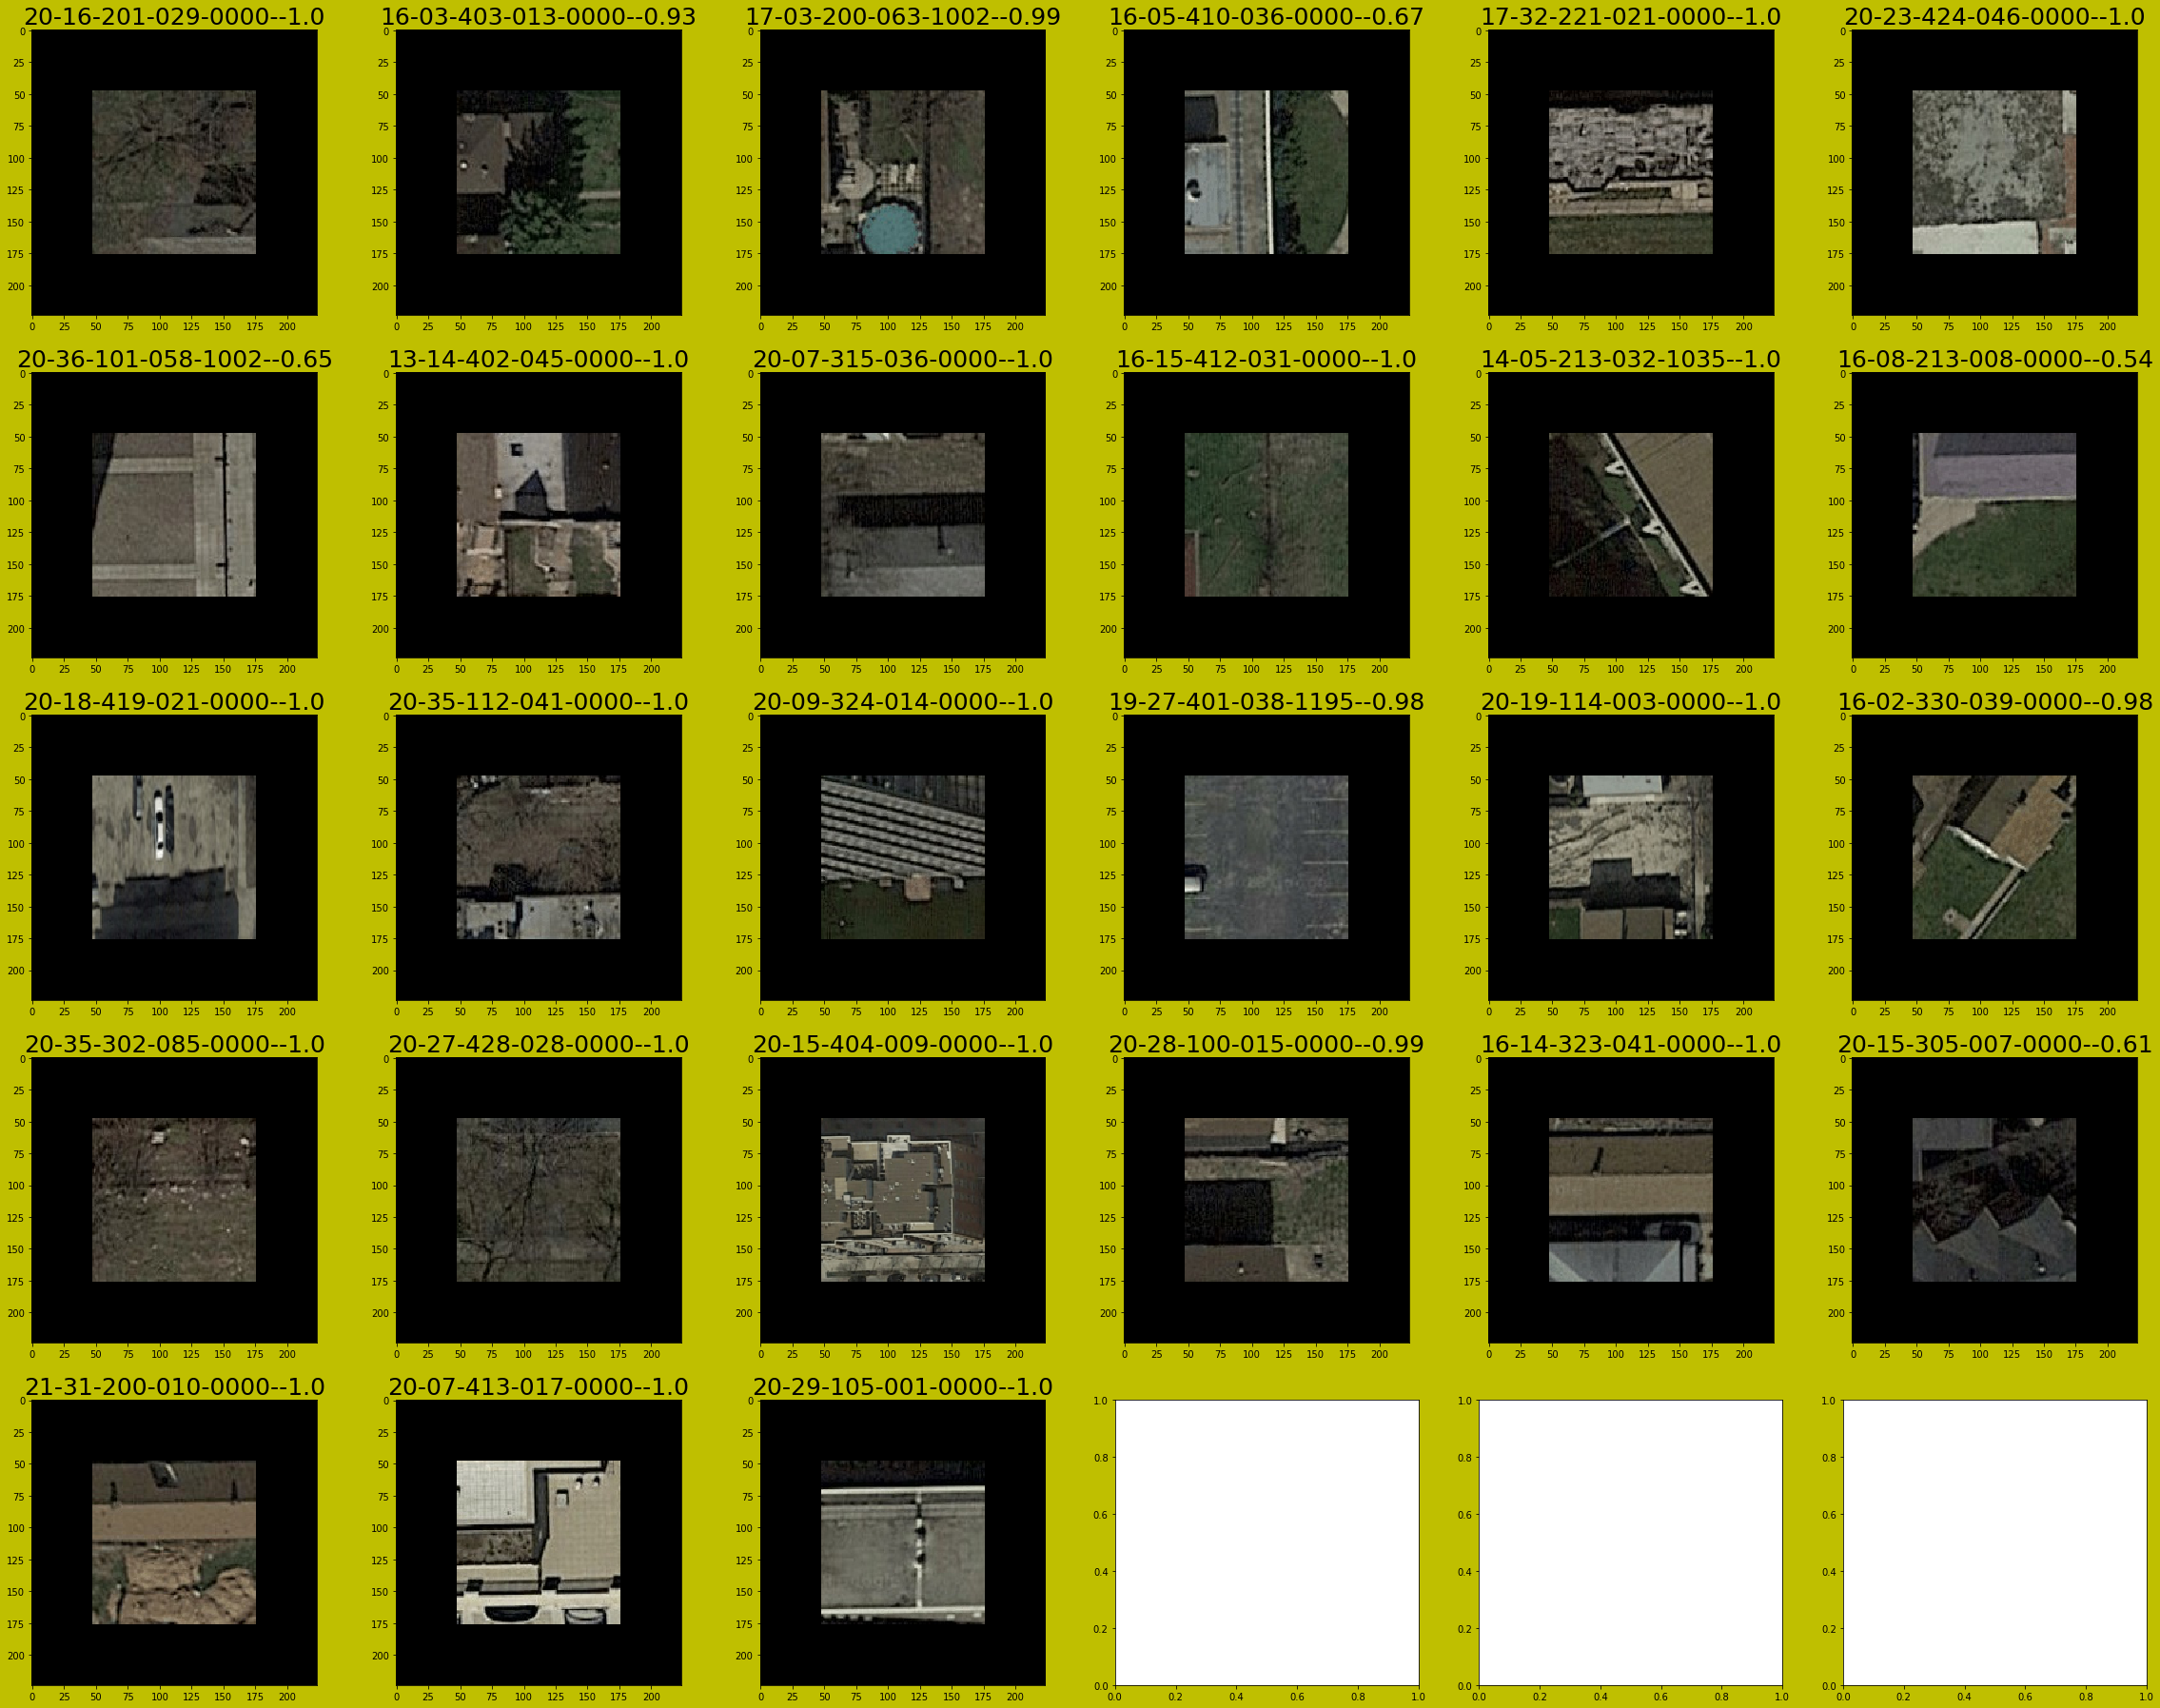

In [96]:
 vizualize(obj_gI, house_misclassified_pins_path[30:60], house_mis_title_arr, data_type='uint8', rows=5, columns=6, figsize=(40, 32))

## OVERLAYED DATA

In [4]:
overlayed_ts_data = pd.read_csv(overlayed_ts_stats, index_col=None)
overlayed_cv_data = pd.read_csv(overlayed_cv_stats, index_col=None)
print (overlayed_ts_data.shape)
print (overlayed_cv_data.shape)
overlayed_ts_data.head(3)

(1086, 21)
(1086, 21)


Label  epoch_1_batch_49_pred  epoch_1_batch_49_prob  epoch_1_batch_59_pred  \
0    0.0                    0.0                    1.0                    0.0   
1    0.0                    1.0                    1.0                    1.0   
2    0.0                    0.0                    1.0                    0.0   

   epoch_1_batch_59_prob  epoch_1_batch_66_pred  epoch_1_batch_66_prob  \
0                1.00000                    0.0               1.000000   
1                0.99708                    1.0               1.000000   
2                1.00000                    0.0               0.918669   

   epoch_2_batch_9_pred  epoch_2_batch_9_prob  epoch_2_batch_19_pred  \
0                   0.0                   1.0                    0.0   
1                   1.0                   1.0                    1.0   
2                   0.0                   1.0                    0.0   

           ...            epoch_2_batch_29_pred  epoch_2_batch_29_prob  \
0          ...                              0.0               1.000000   
1          ...                              1.0               0.988976   
2          ...                              0.0               1.000000   

   epoch_2_batch_39_pred  epoch_2_batch_39_prob  epoch_2_batch_49_pred  \
0                    0.0               1.000000                    0.0   
1                    1.0               0.999999                    0.0   
2                    0.0               1.000000                    0.0   

   epoch_2_batch_49_prob  epoch_2_batch_59_pred  epoch_2_batch_59_prob  \
0               1.000000                    0.0               1.000000   
1               0.999479                    1.0               0.999612   
2               1.000000                    0.0               1.000000   

   epoch_2_batch_66_pred  epoch_2_batch_66_prob  
0                    0.0                    1.0  
1                    1.0                    1.0  
2                    0.0                    1.0  

[3 rows x 21 columns]

## AERIAL DATA

In [7]:
aerial_ts_data = pd.read_csv(aerial_ts_stats, index_col=None)
aerial_cv_data = pd.read_csv(aerial_cv_stats, index_col=None)
print (aerial_ts_data.shape)
print (aerial_cv_data.shape)
aerial_ts_data.head(3)

(1086, 21)
(1086, 21)


Label  epoch_1_batch_49_pred  epoch_1_batch_49_prob  epoch_1_batch_59_pred  \
0    0.0                    0.0               1.000000                    0.0   
1    0.0                    1.0               0.564701                    1.0   
2    0.0                    0.0               1.000000                    0.0   

   epoch_1_batch_59_prob  epoch_1_batch_66_pred  epoch_1_batch_66_prob  \
0               0.999608                    0.0               0.999994   
1               0.995706                    0.0               0.997238   
2               1.000000                    0.0               1.000000   

   epoch_2_batch_9_pred  epoch_2_batch_9_prob  epoch_2_batch_19_pred  \
0                   0.0                   1.0                    0.0   
1                   0.0                   1.0                    0.0   
2                   0.0                   1.0                    0.0   

           ...            epoch_2_batch_29_pred  epoch_2_batch_29_prob  \
0          ...                              0.0               1.000000   
1          ...                              1.0               0.673236   
2          ...                              0.0               1.000000   

   epoch_2_batch_39_pred  epoch_2_batch_39_prob  epoch_2_batch_49_pred  \
0                    0.0                1.00000                    1.0   
1                    0.0                0.99993                    1.0   
2                    0.0                1.00000                    0.0   

   epoch_2_batch_49_prob  epoch_2_batch_59_pred  epoch_2_batch_59_prob  \
0               0.800144                    0.0               0.999972   
1               0.956202                    0.0               0.999993   
2               1.000000                    0.0               1.000000   

   epoch_2_batch_66_pred  epoch_2_batch_66_prob  
0                    0.0               0.999965  
1                    0.0               0.999765  
2                    0.0               1.000000  

[3 rows x 21 columns]

## ASSESSOR DATA

In [8]:
assessor_ts_data = pd.read_csv(assessor_ts_stats, index_col=None)
assessor_cv_data = pd.read_csv(assessor_cv_stats, index_col=None)
print (assessor_ts_data.shape)
print (assessor_cv_data.shape)
assessor_ts_data.head(3)

(1086, 21)
(1086, 21)


Label  epoch_1_batch_49_pred  epoch_1_batch_49_prob  epoch_1_batch_59_pred  \
0    0.0                    0.0                1.00000                    0.0   
1    0.0                    0.0                1.00000                    0.0   
2    0.0                    1.0                0.86196                    1.0   

   epoch_1_batch_59_prob  epoch_1_batch_66_pred  epoch_1_batch_66_prob  \
0               1.000000                    0.0                1.00000   
1               1.000000                    0.0                1.00000   
2               0.999987                    1.0                0.99902   

   epoch_2_batch_9_pred  epoch_2_batch_9_prob  epoch_2_batch_19_pred  \
0                   0.0              1.000000                    0.0   
1                   0.0              1.000000                    0.0   
2                   1.0              0.999204                    0.0   

           ...            epoch_2_batch_29_pred  epoch_2_batch_29_prob  \
0          ...                              0.0                    1.0   
1          ...                              0.0                    1.0   
2          ...                              0.0                    1.0   

   epoch_2_batch_39_pred  epoch_2_batch_39_prob  epoch_2_batch_49_pred  \
0                    0.0                    1.0                    0.0   
1                    0.0                    1.0                    0.0   
2                    0.0                    1.0                    0.0   

   epoch_2_batch_49_prob  epoch_2_batch_59_pred  epoch_2_batch_59_prob  \
0               1.000000                    0.0               1.000000   
1               1.000000                    0.0               1.000000   
2               0.963619                    1.0               0.999992   

   epoch_2_batch_66_pred  epoch_2_batch_66_prob  
0                    0.0                    1.0  
1                    0.0                    1.0  
2                    1.0                    1.0  

[3 rows x 21 columns]

# ANALYSIS BEGINS:
--------

In [24]:
col_list = assessor_cv_data.columns
pred_col_list = [cols for cols in col_list if cols.split('_')[-1] == "pred"]
prob_col_list = [cols for cols in col_list if cols.split('_')[-1] == "prob"]
print (pred_col_list)
print (prob_col_list)

['epoch_1_batch_49_pred', 'epoch_1_batch_59_pred', 'epoch_1_batch_66_pred', 'epoch_2_batch_9_pred', 'epoch_2_batch_19_pred', 'epoch_2_batch_29_pred', 'epoch_2_batch_39_pred', 'epoch_2_batch_49_pred', 'epoch_2_batch_59_pred', 'epoch_2_batch_66_pred']
['epoch_1_batch_49_prob', 'epoch_1_batch_59_prob', 'epoch_1_batch_66_prob', 'epoch_2_batch_9_prob', 'epoch_2_batch_19_prob', 'epoch_2_batch_29_prob', 'epoch_2_batch_39_prob', 'epoch_2_batch_49_prob', 'epoch_2_batch_59_prob', 'epoch_2_batch_66_prob']


In [28]:
overlayed_ts_pins = pd.concat([test_pins, overlayed_ts_data[pred_col_list]], axis=1)
aerial_ts_pins = pd.concat([test_pins, aerial_ts_data[pred_col_list]], axis=1)
assessor_ts_pins = pd.concat([test_pins, assessor_ts_data[pred_col_list]], axis=1)

overlayed_cv_pins = pd.concat([cv_pins, overlayed_cv_data[pred_col_list]], axis=1)
aerial_cv_pins = pd.concat([cv_pins, aerial_cv_data[pred_col_list]], axis=1)
assessor_cv_pins = pd.concat([cv_pins, assessor_cv_data[pred_col_list]], axis=1)

print (overlayed_ts_pins.shape, aerial_ts_pins.shape, assessor_ts_pins.shape)
print (overlayed_cv_pins.shape, aerial_cv_pins.shape, assessor_cv_pins.shape)

(1086, 13) (1086, 13) (1086, 13)
(1086, 13) (1086, 13) (1086, 13)


## OVERLAYED IMAGES
---------

In [30]:
overlayed_ts_pins.head(3)

property_pins property_type dataset_type  epoch_1_batch_49_pred  \
0  21-31-209-007-0000          land         test                    0.0   
1  20-04-222-037-0000          land         test                    1.0   
2  16-03-100-033-0000          land         test                    0.0   

   epoch_1_batch_59_pred  epoch_1_batch_66_pred  epoch_2_batch_9_pred  \
0                    0.0                    0.0                   0.0   
1                    1.0                    1.0                   1.0   
2                    0.0                    0.0                   0.0   

   epoch_2_batch_19_pred  epoch_2_batch_29_pred  epoch_2_batch_39_pred  \
0                    0.0                    0.0                    0.0   
1                    1.0                    1.0                    1.0   
2                    0.0                    0.0                    0.0   

   epoch_2_batch_49_pred  epoch_2_batch_59_pred  epoch_2_batch_66_pred  
0                    0.0                    0.0                    0.0  
1                    0.0                    1.0                    1.0  
2                    0.0                    0.0                    0.0

#### SHOULD BE LAND --> PINS: Wrong classification: 

In [38]:
list(overlayed_ts_pins[((overlayed_ts_pins['property_type'] == 'land') & 
                   (overlayed_ts_pins['epoch_1_batch_49_pred'] == 1) &
                   (overlayed_ts_pins['epoch_1_batch_59_pred'] == 1) &
                   (overlayed_ts_pins['epoch_1_batch_66_pred'] == 1) &
                   (overlayed_ts_pins['epoch_2_batch_9_pred'] ==  1) &
                   (overlayed_ts_pins['epoch_2_batch_19_pred'] == 1) &
                   (overlayed_ts_pins['epoch_2_batch_29_pred'] == 1) &
                   (overlayed_ts_pins['epoch_2_batch_39_pred'] == 1) &
                   (overlayed_ts_pins['epoch_2_batch_49_pred'] == 1) &
                   (overlayed_ts_pins['epoch_2_batch_59_pred'] == 1) &
                   (overlayed_ts_pins['epoch_2_batch_66_pred'] == 1))]['property_pins'])

['20-06-402-017-0000',
 '20-19-122-031-0000',
 '14-30-409-094-0000',
 '16-01-409-024-0000',
 '20-29-429-029-0000',
 '17-35-102-033-0000',
 '20-11-311-033-0000',
 '14-20-323-068-0000',
 '17-05-107-044-0000',
 '16-24-207-075-0000',
 '13-36-221-022-0000',
 '21-31-103-037-0000',
 '20-16-202-080-0000',
 '20-21-411-038-0000',
 '19-03-407-040-0000',
 '17-04-413-020-0000',
 '20-08-115-017-0000',
 '20-25-424-034-0000',
 '20-21-315-037-0000',
 '13-33-110-073-0000',
 '20-29-207-014-0000',
 '20-19-128-014-0000',
 '16-15-414-011-0000',
 '13-24-314-055-0000',
 '13-09-124-021-0000',
 '20-33-123-012-0000',
 '17-22-302-043-0000',
 '20-22-200-002-0000']

### SHOULD BE HOUSE --> WRONG CLASSIFICATION

In [39]:
list(overlayed_ts_pins[((overlayed_ts_pins['property_type'] == 'house') & 
                   (overlayed_ts_pins['epoch_1_batch_49_pred'] == 0) &
                   (overlayed_ts_pins['epoch_1_batch_59_pred'] == 0) &
                   (overlayed_ts_pins['epoch_1_batch_66_pred'] == 0) &
                   (overlayed_ts_pins['epoch_2_batch_9_pred'] ==  0) &
                   (overlayed_ts_pins['epoch_2_batch_19_pred'] == 0) &
                   (overlayed_ts_pins['epoch_2_batch_29_pred'] == 0) &
                   (overlayed_ts_pins['epoch_2_batch_39_pred'] == 0) &
                   (overlayed_ts_pins['epoch_2_batch_49_pred'] == 0) &
                   (overlayed_ts_pins['epoch_2_batch_59_pred'] == 0) &
                   (overlayed_ts_pins['epoch_2_batch_66_pred'] == 0))]['property_pins'])

['19-25-317-004-0000',
 '20-08-122-031-0000',
 '17-16-128-007-1011',
 '16-10-416-028-0000',
 '21-31-325-027-0000',
 '17-09-406-054-1029',
 '16-10-327-015-0000',
 '10-36-204-024-0000',
 '17-34-113-020-0000',
 '14-16-300-032-1325',
 '16-11-222-026-0000',
 '20-18-419-021-0000',
 '20-07-323-016-0000',
 '17-32-226-014-0000',
 '17-04-220-098-1168',
 '17-10-400-031-1428',
 '20-20-322-008-0000',
 '21-31-310-026-0000']

## AERIAL IMAGES

## SHOULD BE LAND

In [41]:
list(aerial_ts_pins[((aerial_ts_pins['property_type'] == 'land') & 
                   (aerial_ts_pins['epoch_1_batch_49_pred'] == 1) &
                   (aerial_ts_pins['epoch_1_batch_59_pred'] == 1) &
                   (aerial_ts_pins['epoch_1_batch_66_pred'] == 1) &
                   (aerial_ts_pins['epoch_2_batch_9_pred'] ==  1) &
                   (aerial_ts_pins['epoch_2_batch_19_pred'] == 1) &
                   (aerial_ts_pins['epoch_2_batch_29_pred'] == 1) &
                   (aerial_ts_pins['epoch_2_batch_39_pred'] == 1) &
                   (aerial_ts_pins['epoch_2_batch_49_pred'] == 1) &
                   (aerial_ts_pins['epoch_2_batch_59_pred'] == 1) &
                   (aerial_ts_pins['epoch_2_batch_66_pred'] == 1))]['property_pins'])

['20-06-402-017-0000',
 '14-31-321-060-0000',
 '20-17-105-026-0000',
 '20-33-310-038-0000',
 '16-01-409-024-0000',
 '16-35-411-030-0000',
 '17-35-102-033-0000',
 '20-17-221-007-0000',
 '20-17-115-038-0000',
 '16-24-207-075-0000',
 '13-36-221-022-0000',
 '20-07-205-041-0000',
 '16-26-326-005-0000',
 '16-14-328-023-0000',
 '20-07-406-002-0000',
 '20-20-305-039-0000',
 '13-32-125-002-0000',
 '20-21-411-038-0000',
 '17-06-107-054-0000',
 '19-03-407-040-0000',
 '20-16-213-016-0000',
 '17-04-413-020-0000',
 '16-23-114-023-0000',
 '20-08-115-017-0000',
 '20-25-424-034-0000',
 '20-20-323-026-0000',
 '20-21-315-037-0000',
 '13-33-110-073-0000',
 '16-13-304-020-0000',
 '16-09-402-025-0000',
 '20-19-128-014-0000',
 '17-34-320-016-0000',
 '16-15-414-011-0000',
 '13-24-314-055-0000',
 '20-06-418-019-0000',
 '16-14-403-024-0000',
 '16-09-224-004-0000',
 '13-09-124-021-0000',
 '20-33-123-012-0000',
 '20-08-413-037-0000',
 '16-15-308-024-0000',
 '20-09-328-006-0000',
 '20-05-303-022-0000']

#### SHOULD BE HOUSE

In [42]:
list(aerial_ts_pins[((aerial_ts_pins['property_type'] == 'house') & 
                   (aerial_ts_pins['epoch_1_batch_49_pred'] == 0) &
                   (aerial_ts_pins['epoch_1_batch_59_pred'] == 0) &
                   (aerial_ts_pins['epoch_1_batch_66_pred'] == 0) &
                   (aerial_ts_pins['epoch_2_batch_9_pred'] ==  0) &
                   (aerial_ts_pins['epoch_2_batch_19_pred'] == 0) &
                   (aerial_ts_pins['epoch_2_batch_29_pred'] == 0) &
                   (aerial_ts_pins['epoch_2_batch_39_pred'] == 0) &
                   (aerial_ts_pins['epoch_2_batch_49_pred'] == 0) &
                   (aerial_ts_pins['epoch_2_batch_59_pred'] == 0) &
                   (aerial_ts_pins['epoch_2_batch_66_pred'] == 0))]['property_pins'])

['11-30-315-004-0000',
 '19-25-317-004-0000',
 '20-18-422-027-0000',
 '20-08-122-031-0000',
 '19-21-111-015-0000',
 '10-32-102-063-0000',
 '17-16-128-007-1315',
 '17-30-105-025-0000',
 '20-35-124-014-0000',
 '14-16-300-027-1035',
 '20-19-128-037-0000',
 '20-20-424-021-0000',
 '17-16-128-007-1011',
 '16-15-411-026-0000',
 '20-20-225-042-0000',
 '19-25-317-005-0000',
 '21-31-325-027-0000',
 '20-28-311-015-0000',
 '20-21-322-010-0000',
 '20-28-201-014-0000',
 '20-18-112-004-0000',
 '20-36-317-004-0000',
 '16-15-217-045-0000',
 '20-20-320-003-0000',
 '20-17-303-012-0000',
 '10-36-204-024-0000',
 '20-17-311-026-0000',
 '20-07-110-012-0000',
 '20-08-110-001-0000',
 '20-23-420-002-0000',
 '17-34-113-020-0000',
 '13-32-302-036-0000',
 '20-09-308-045-0000',
 '20-16-318-032-0000',
 '13-25-116-022-0000',
 '20-19-330-043-0000',
 '20-18-206-024-0000',
 '20-20-400-003-0000',
 '14-16-300-032-1325',
 '16-11-222-026-0000',
 '16-15-124-008-0000',
 '20-19-309-027-0000',
 '16-15-102-032-0000',
 '21-30-417

## ASSESSOR IMAGES

#### SHOULD BE LAND

In [43]:
list(assessor_ts_pins[((assessor_ts_pins['property_type'] == 'land') & 
                   (assessor_ts_pins['epoch_1_batch_49_pred'] == 1) &
                   (assessor_ts_pins['epoch_1_batch_59_pred'] == 1) &
                   (assessor_ts_pins['epoch_1_batch_66_pred'] == 1) &
                   (assessor_ts_pins['epoch_2_batch_9_pred'] ==  1) &
                   (assessor_ts_pins['epoch_2_batch_19_pred'] == 1) &
                   (assessor_ts_pins['epoch_2_batch_29_pred'] == 1) &
                   (assessor_ts_pins['epoch_2_batch_39_pred'] == 1) &
                   (assessor_ts_pins['epoch_2_batch_49_pred'] == 1) &
                   (assessor_ts_pins['epoch_2_batch_59_pred'] == 1) &
                   (assessor_ts_pins['epoch_2_batch_66_pred'] == 1))]['property_pins'])

['16-23-113-017-0000',
 '20-17-308-034-0000',
 '14-31-321-060-0000',
 '16-23-400-049-0000',
 '20-19-122-031-0000',
 '14-30-409-094-0000',
 '16-27-205-005-0000',
 '16-01-409-024-0000',
 '16-15-316-047-0000',
 '16-15-110-008-0000',
 '20-31-102-014-0000',
 '20-30-427-018-0000',
 '16-05-215-002-0000',
 '14-20-323-068-0000',
 '20-19-206-015-0000',
 '20-20-305-025-0000',
 '20-25-407-016-0000',
 '21-31-409-024-0000',
 '16-15-209-015-0000',
 '20-07-205-041-0000',
 '16-26-326-005-0000',
 '20-16-202-080-0000',
 '16-15-212-016-0000',
 '21-30-200-016-0000',
 '20-20-103-019-0000',
 '20-15-114-008-0000',
 '20-09-416-026-0000',
 '20-08-115-017-0000',
 '20-35-223-047-0000',
 '20-17-102-018-0000',
 '16-10-413-022-0000',
 '16-15-114-009-0000',
 '20-21-315-037-0000',
 '20-29-101-020-0000',
 '13-33-110-073-0000',
 '20-16-402-026-0000',
 '16-09-402-025-0000',
 '16-23-401-038-0000',
 '14-29-313-041-0000',
 '20-34-205-024-0000',
 '20-08-118-006-0000',
 '16-03-415-022-0000',
 '16-15-207-033-0000',
 '16-11-128

#### SHOULD BE HOUSE

In [44]:
list(assessor_ts_pins[((assessor_ts_pins['property_type'] == 'house') & 
                   (assessor_ts_pins['epoch_1_batch_49_pred'] == 0) &
                   (assessor_ts_pins['epoch_1_batch_59_pred'] == 0) &
                   (assessor_ts_pins['epoch_1_batch_66_pred'] == 0) &
                   (assessor_ts_pins['epoch_2_batch_9_pred'] ==  0) &
                   (assessor_ts_pins['epoch_2_batch_19_pred'] == 0) &
                   (assessor_ts_pins['epoch_2_batch_29_pred'] == 0) &
                   (assessor_ts_pins['epoch_2_batch_39_pred'] == 0) &
                   (assessor_ts_pins['epoch_2_batch_49_pred'] == 0) &
                   (assessor_ts_pins['epoch_2_batch_59_pred'] == 0) &
                   (assessor_ts_pins['epoch_2_batch_66_pred'] == 0))]['property_pins'])

['20-22-309-035-0000',
 '19-25-317-004-0000',
 '20-08-122-031-0000',
 '20-19-315-019-0000',
 '20-17-412-044-0000',
 '19-13-200-038-0000',
 '20-36-102-014-0000',
 '20-21-319-024-0000',
 '13-05-406-002-0000',
 '21-31-215-003-0000',
 '17-07-215-008-0000',
 '16-02-312-008-0000',
 '20-08-412-043-0000',
 '19-01-315-037-0000',
 '20-03-120-022-0000',
 '20-20-104-020-0000',
 '20-26-201-036-0000',
 '19-25-317-005-0000',
 '14-28-113-035-1087',
 '13-10-314-050-0000',
 '20-07-427-014-0000',
 '16-22-225-008-0000',
 '11-29-102-052-1004',
 '20-28-201-014-0000',
 '13-36-432-022-0000',
 '19-13-406-029-0000',
 '14-19-217-038-0000',
 '20-17-209-026-0000',
 '16-22-404-033-0000',
 '16-27-413-009-0000',
 '20-17-207-024-0000',
 '13-01-103-021-0000',
 '20-17-314-001-0000',
 '10-36-204-024-0000',
 '16-24-106-023-0000',
 '20-30-429-010-0000',
 '20-17-311-026-0000',
 '20-07-110-012-0000',
 '20-21-320-016-0000',
 '16-15-110-021-0000',
 '20-18-400-017-0000',
 '20-09-101-046-0000',
 '20-23-420-002-0000',
 '20-17-311